In [1]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5

In [2]:
sample = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ggF.root"

In [3]:
events = NanoEventsFactory.from_root(
    {sample:"/Events"},
    schemaclass=PFNanoAODSchema,
).events()

/uscms/home/nyabando/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/uscms/home/nyabando/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:243: RuntimeWarning: Missing cross-reference index for GenFatJetCands_jetIdx => GenJetAK8
  warnings.warn(
/uscms/home/nyabando/nobackup/min

In [4]:
events.FatJet.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'nConstituents',
 'DDX_tau1_flightDistance2dSig',
 'DDX_tau1_trackEtaRel_0',
 'DDX_tau1_trackEt

In [5]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 450)
                       & (abs(fatjets.eta) < 2.5)
                       #& fatjets.isTight
                      ]

leadingjets = candidatejet 
oldpt=leadingjets.pt

In [6]:
#len(ak.flatten(leading.jets))

In [7]:
import fastjet

In [8]:
jetdef = fastjet.JetDefinition(
        fastjet.cambridge_algorithm, 0.8
    )

pf = ak.flatten(leadingjets.constituents.pf,axis=1)
# cluster = fastjet.ClusterSequence(pf, jetdef)
softdrop_zcut10_beta0 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=0)

In [9]:
#bins=np.linspace(0,300,30)
# plt.hist(ak.flatten(leadingjets.phi).compute(),histtype='step',label='default');
# # plt.hist(softdrop_zcut10_beta0.phi.compute(),histtype='step',label='recalculated');

# plt.legend(frameon=False)
# plt.xlabel('phi')
# plt.legend()

In [10]:
# events['PFCands', 'pt'] = (
#                 events.PFCands.pt
#                 * events.PFCands.puppiWeight
#             )

In [11]:
# #bins=np.linspace(0,300,30)
# plt.hist(ak.flatten(oldpt).compute(),histtype='step',label='puppi');
# # plt.hist(ak.flatten.pt.compute(),histtype='step',label='recalculated');
# plt.legend(frameon=False)
# plt.xlabel('pt')
# plt.legend()

In [12]:
softdrop_zcut10_beta1 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=1)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


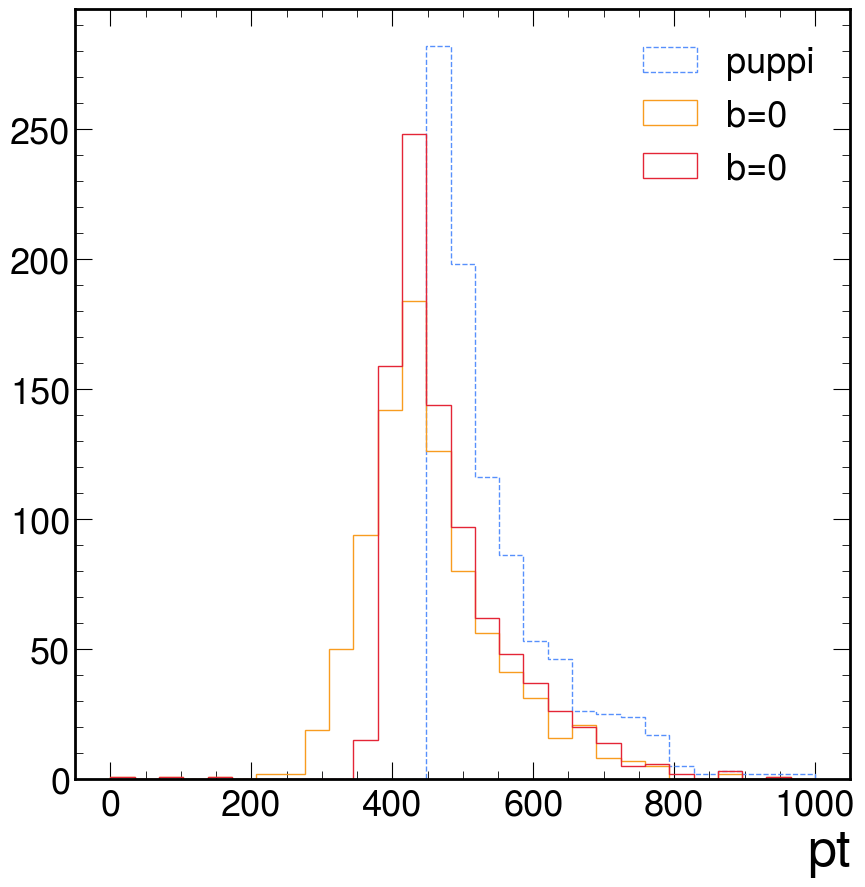

In [13]:
bins=np.linspace(0,1000,30)
plt.hist(ak.flatten(oldpt).compute(),histtype='step',label='puppi', bins=bins ,linestyle='--');
# plt.hist(ak.flatten(leadingjets.pt).compute(), histtype='step', bins=bins, label='default')
plt.hist(softdrop_zcut10_beta0.ptsoftdrop.compute(), histtype='step', bins=bins, label='b=0');
plt.hist(softdrop_zcut10_beta1.ptsoftdrop.compute(), histtype='step', bins=bins, label='b=0');

plt.legend(frameon=False)
plt.xlabel('pt')
plt.legend()

In [14]:
# bins=np.linspace(0,1000,30)
# plt.hist(ak.flatten(leadingjets.eta).compute(), histtype='step', label='default')
# plt.hist(softdrop_zcut10_beta0.etasoftdrop.compute(), histtype='step', label='recalculated');
# plt.legend(frameon=False)
# plt.xlabel('eta')
# plt.legend()

In [15]:
# bins=np.linspace(0,1000,30)
# plt.hist(ak.flatten(leadingjets.phi).compute(), histtype='step', label='default')
# plt.hist(softdrop_zcut10_beta0.phisoftdrop.compute() -3, histtype='step', label='recalculated');
# plt.legend(frameon=False)
# plt.xlabel('phi')
# plt.legend()

In [16]:
# x = ak.flatten(leadingjets.pt)
# y = softdrop_zcut10_beta0.ptsoftdrop

In [17]:
# fig, ax = plt.subplots(figsize=(10, 8))
# scatter = ax.scatter(x, y, alpha=0.5, s=1)
# ax.set_xlabel('Leading Jet pt [GeV]')
# ax.set_ylabel('Soft Drop pt [GeV]')
# ax.set_title('Leading Jet pt vs Soft Drop pt')
# plt.tight_layout()
# plt.show()

In [18]:
testmass=(leadingjets.subjets * (1 - leadingjets.subjets.rawFactor)).sum()

In [19]:
testmass=testmass.mass

In [20]:
softdrop_zcut10_beta1 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=1)

In [21]:
softdrop_zcut10_beta2 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=2)

In [22]:
softdrop_zcut10_beta3 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(beta=-0.5)

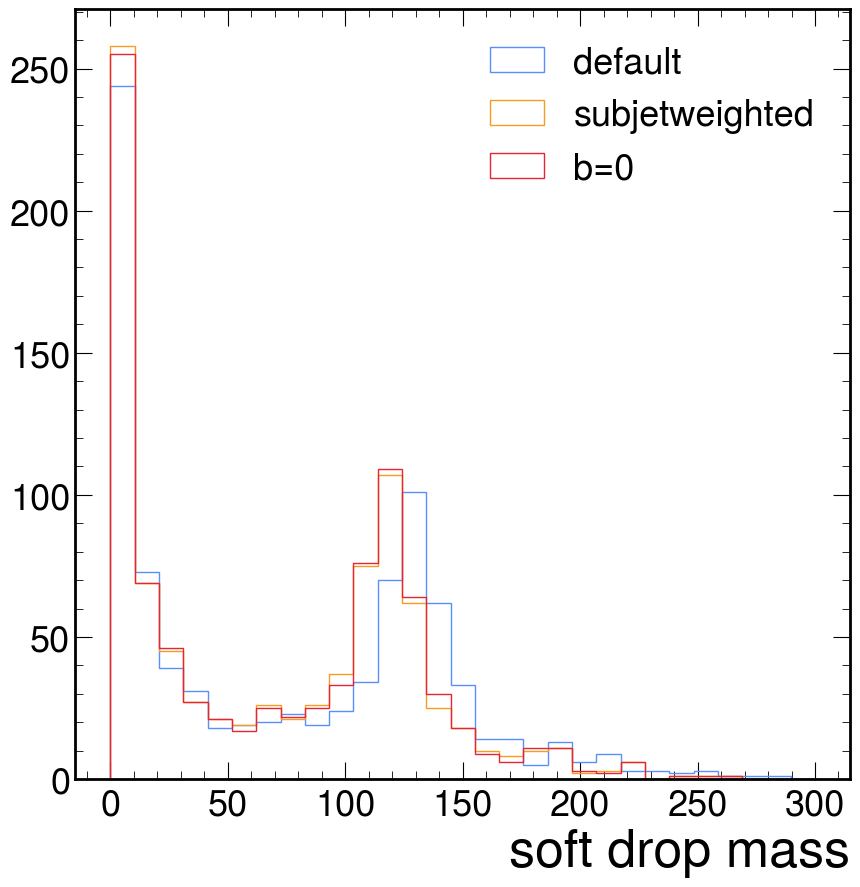

In [23]:
bins=np.linspace(0,300,30)
plt.hist(ak.flatten(leadingjets.msoftdrop.compute()),histtype='step',bins=bins,label='default');
plt.hist(ak.flatten(testmass.compute()), histtype='step', bins=bins, label='subjetweighted')
plt.hist(softdrop_zcut10_beta0.msoftdrop.compute(),histtype='step', bins=bins, label='b=0');

plt.legend(frameon=False)
plt.xlabel('soft drop mass')
plt.legend()

In [24]:
#Plot a heatmap
# bins = np.linspace(0, 200, 50)
# fig, ax = plt.subplots(figsize=(10, 8))
# h, xedges, yedges, im = ax.hist2d(softdrop_zcut10_beta0.msoftdrop.compute(), ak.flatten(testmass.compute()),bins=bins, cmap='viridis')

# ax.set_xlabel('Recalculated[GeV]')
# ax.set_ylabel('SubjetWeighted [GeV]')
# ax.set_title('recalculated vs subjetwighted')

# plt.tight_layout()
# plt.show()

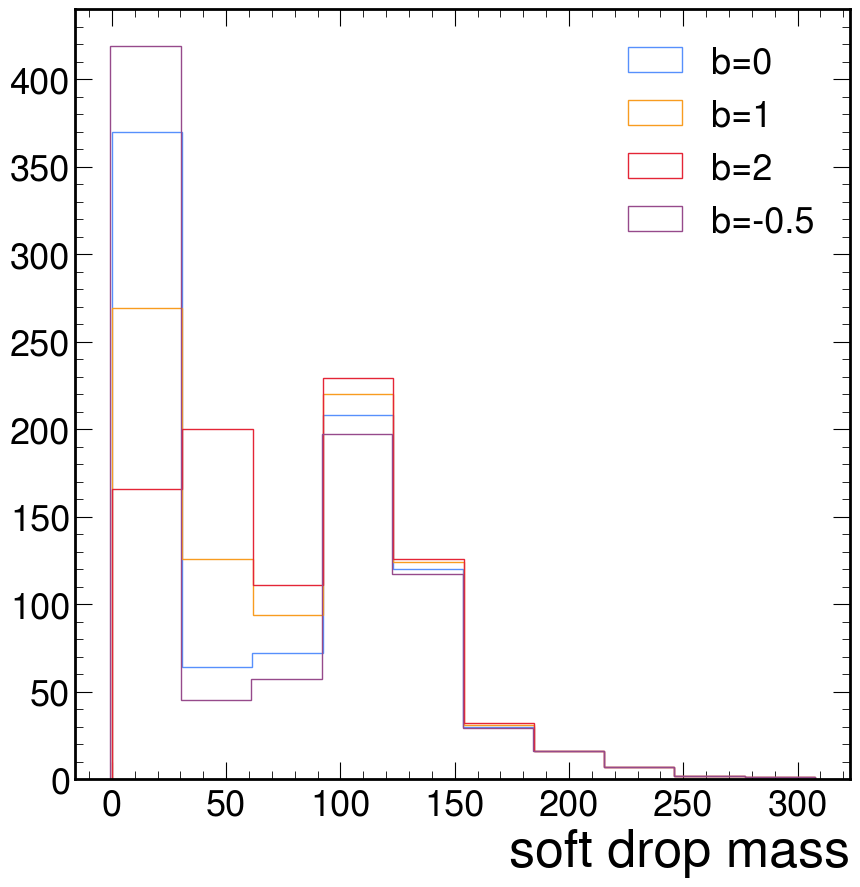

In [25]:
#bins=np.linspace(0,300,30)
# plt.hist(ak.flatten(leadingjets.msoftdrop.compute()),histtype='step',label='default');
# plt.hist(ak.flatten(testmass.compute()), histtype='step', label='subjetweighted')
plt.hist(softdrop_zcut10_beta0.msoftdrop.compute(),histtype='step',label='b=0');
plt.hist(softdrop_zcut10_beta1.msoftdrop.compute(),histtype='step',label='b=1');
plt.hist(softdrop_zcut10_beta2.msoftdrop.compute(),histtype='step',label='b=2');
plt.hist(softdrop_zcut10_beta3.msoftdrop.compute(),histtype='step',label='b=-0.5');

plt.legend(frameon=False)
plt.xlabel('soft drop mass')
plt.legend()

In [26]:
# softdrop = cluster.exclusive_jets_softdrop_grooming()
# softdrop_cluster= fastjet.ClusterSequence(softdrop.constituents, jetdef)

In [27]:
softdrop_zcut10_beta0_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta0.constituents, jetdef)

In [28]:
n2 = softdrop_zcut10_beta0_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [29]:
softdrop_zcut10_beta1_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta1.constituents, jetdef)

In [30]:
n2b = softdrop_zcut10_beta1_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [31]:
softdrop_zcut10_beta2_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta2.constituents, jetdef)

In [32]:
n2b2 = softdrop_zcut10_beta2_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [33]:
softdrop_zcut10_beta3_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta3.constituents, jetdef)

In [34]:
n2b3 = softdrop_zcut10_beta3_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

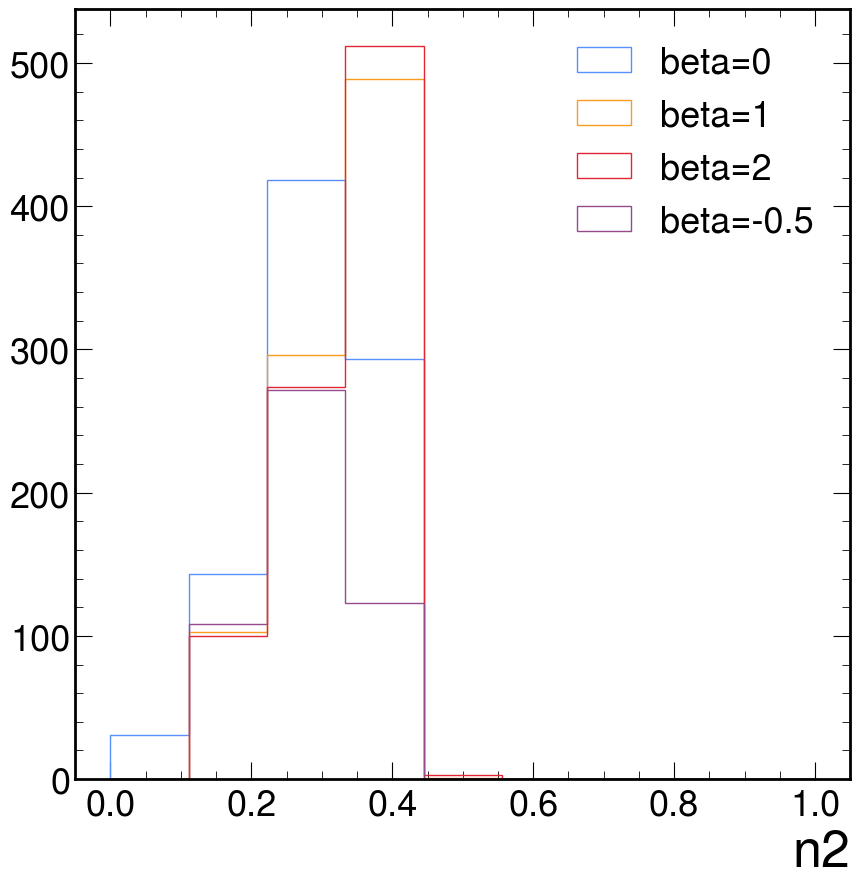

In [35]:
bins=np.linspace(0,1,10)
#plt.hist(ak.flatten(leadingjets.n2b1.compute()), histtype='step', label='default', bins = bins);
plt.hist(n2.compute(), histtype='step', label = 'beta=0', bins=bins)
plt.hist(n2b.compute(), histtype='step', label= 'beta=1', bins= bins)
plt.hist(n2b2.compute(), histtype='step', label = 'beta=2', bins=bins)
plt.hist(n2b3.compute(), histtype='step', label= 'beta=-0.5', bins= bins)

plt.legend(frameon=False)
plt.xlabel('n2')
plt.legend()

In [36]:
#define zcut
softdrop_zcut5_beta0 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(symmetry_cut=0.05)

In [37]:
softdrop_zcut20_beta0 = fastjet.ClusterSequence(pf, jetdef).exclusive_jets_softdrop_grooming(symmetry_cut=0.20)

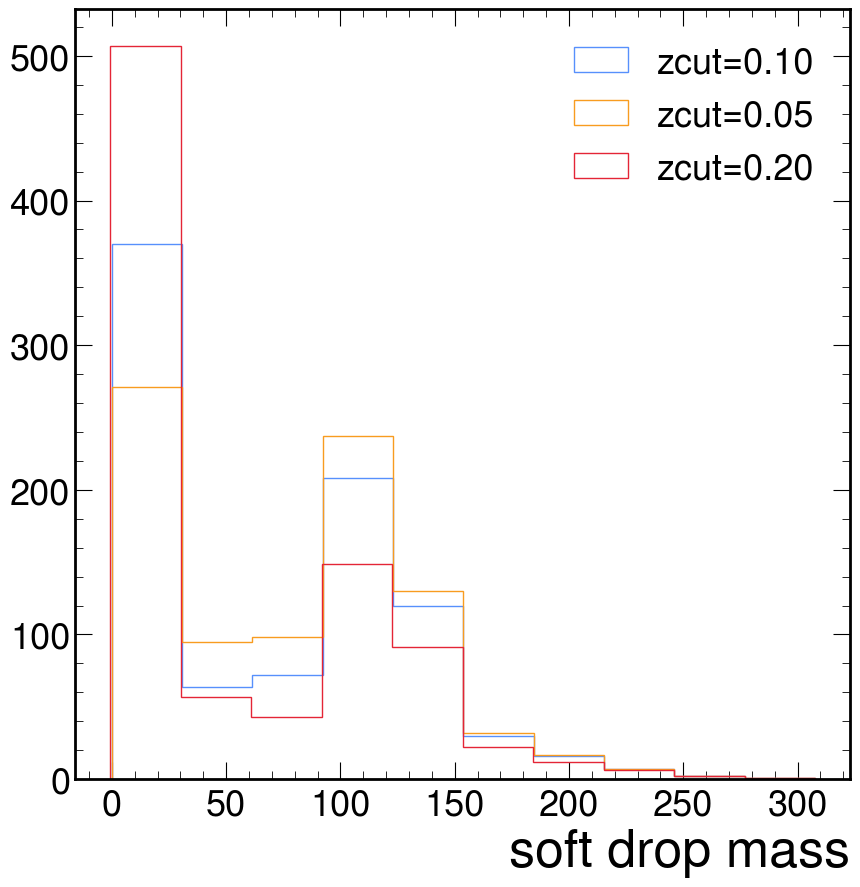

In [38]:
#bins=np.linspace(0,300,30)
#plt.hist(ak.flatten(leadingjets.msoftdrop.compute()),histtype='step',bins=bins,label='default');
#plt.hist(ak.flatten(testmass.compute()), histtype='step', bins=bins, label='subjetweighted')
plt.hist(softdrop_zcut10_beta0.msoftdrop.compute(),histtype='step',label='zcut=0.10');
plt.hist(softdrop_zcut5_beta0.msoftdrop.compute(),histtype='step',label='zcut=0.05');
plt.hist(softdrop_zcut20_beta0.msoftdrop.compute(),histtype='step',label='zcut=0.20');


plt.legend(frameon=False)
plt.xlabel('soft drop mass')
plt.legend()

In [39]:
softdrop_zcut20_beta0_cluster = fastjet.ClusterSequence(softdrop_zcut20_beta0.constituents, jetdef)

In [40]:
n2z2 = softdrop_zcut20_beta0_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

In [41]:
softdrop_zcut5_beta0_cluster = fastjet.ClusterSequence(softdrop_zcut5_beta0.constituents, jetdef)

In [42]:
n2z5 = softdrop_zcut5_beta0_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

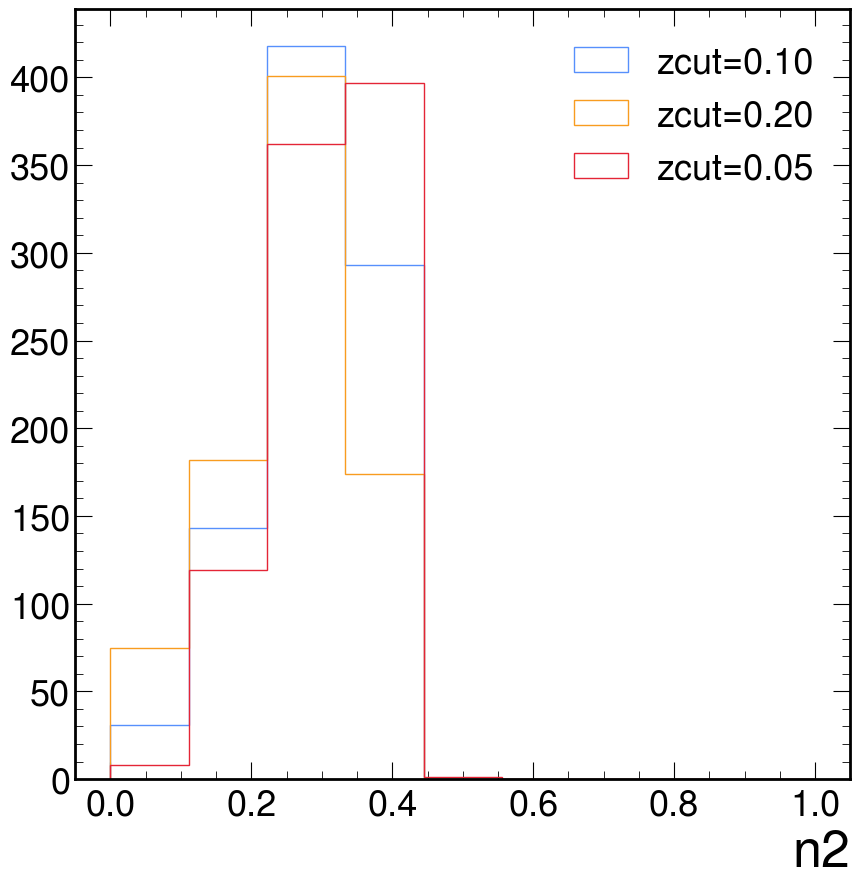

In [43]:
bins=np.linspace(0,1,10)
#plt.hist(ak.flatten(leadingjets.n2b1.compute()), histtype='step', label='default', bins = bins);
plt.hist(n2.compute(), histtype='step', label = 'zcut=0.10', bins=bins)
plt.hist(n2z2.compute(), histtype='step', label= 'zcut=0.20', bins= bins)
plt.hist(n2z5.compute(), histtype='step', label = 'zcut=0.05', bins=bins)

plt.legend(frameon=False)
plt.xlabel('n2')
plt.legend()